#### 1. Histogram

Histograms depict the image's intensity and serve as a tool for enhancing image attributes.

In [ ]:
%pip install -U IPython 

In [19]:

import matplotlib.pyplot as plt
import cv2
import numpy as np

import requests
from IPython.display import Image

from pathlib import Path


Here I define a download method to download images for the lab.

In [22]:
def download_image(url, new_filename):
    response = requests.get(url)
    with open(new_filename, 'wb') as f:
        f.write(response.content)

In [201]:
# Create the directory
Path("Data/09_Histogram").mkdir(parents=True, exist_ok=True)

# Download the images
lennaPath = "http://www.lenna.org/len_std.jpg"
download_image(lennaPath, "Data/09_Histogram/lenna.jpg")

mandrillPath = "https://africageographic.com/wp-content/uploads/2021/03/Male-mandrill-South-Eastern-Gabons-Rainforest-Giovanni-Mari.jpg"
download_image(mandrillPath, "Data/09_Histogram/mandrill.jpg")

housePath = "http://sarvdelir.persiangig.com/image/kusalu/2/4.jpg"
download_image(housePath, "Data/09_Histogram/house.jpg")

villagePath = "https://images.kojaro.com/2022/1/ca44fd97-abfe-4fe7-904d-60639fecaf37.jpg"
download_image(villagePath, "Data/09_Histogram/village.jpg")


fingerprintPath = "https://upload.wikimedia.org/wikipedia/commons/1/10/Fingerprintforcriminologystubs.jpg"
download_image(fingerprintPath, "Data/09_Histogram/fingerprint.jpg")

tumorPath = "https://healthimaging.com/sites/default/files/styles/gallery/public/2022-08/COVID%20Vaccine%20Adenopathy%2037-year-old_RSNA.jpg.webp?itok=vT9Js9N1"
download_image(tumorPath, "Data/09_Histogram/tumor.jpg")



define a helper function to plot two images side-by-side

In [344]:
def plot_image(image_1, image_2, first_title="Orignal Image", second_title="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(first_title)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(second_title)
    plt.show()

In [345]:
def plot_hist(image, title):
    plt.figure(figsize=(5,5))
    intensityValues = np.array([x for x in range(hist.shape[0])])
    plt.bar(intensityValues, image[:,0], width = 5)
    plt.title(title)
    plt.xlabel('intensity')
    plt.show()

Gray Scale Histograms

Let's read a color image as a grayscale image.

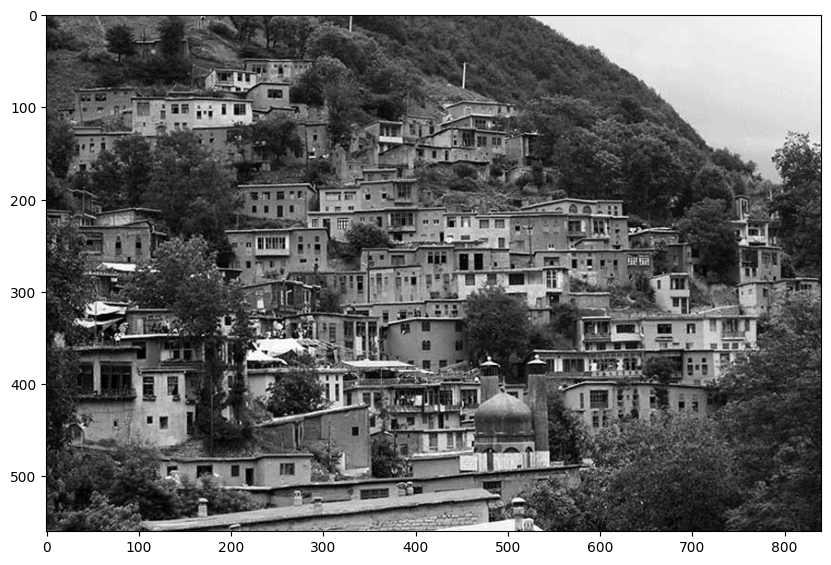

In [346]:
village = cv2.imread("Data/09_Histogram/village.jpg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(village,cmap="gray")
plt.show()

We can calculate the histogram using the calcHist function. 

cv2.calcHist([images], channels, mask, histSize, ranges)
- images: This is the target image.
- channels: This refer to a list of indexes indicating the specific channel for which we aim to calculate a histogram. In the case of a grayscale image, the list would typically consist of [0] to compute the histogram.
- When a mask is provided, the histogram will be generated exclusively for the pixels that are masked. If there's no intention to apply a mask, can be set to None.
- histSize: The quantity of bins desired for histogram computation.
- ranges: Specifies the range of potential pixel values, typically set as [0, 256].

In [347]:
hist = cv2.calcHist([village],[0], None, [256], [0,256])

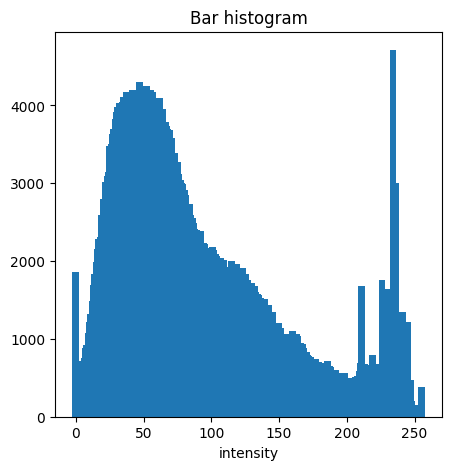

In [348]:
plot_hist(hist, "Bar histogram")

We can also apply a histogram to each image color channel:

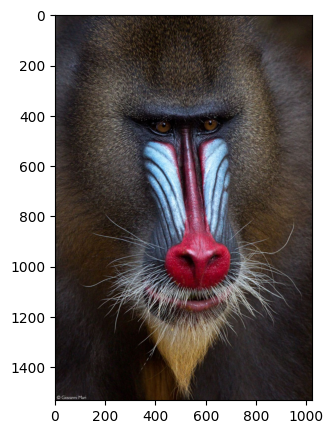

In [349]:
mandrill = cv2.imread("Data/09_Histogram/mandrill.jpg")
mandrillRGB = cv2.cvtColor(mandrill, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(mandrillRGB)
plt.show()

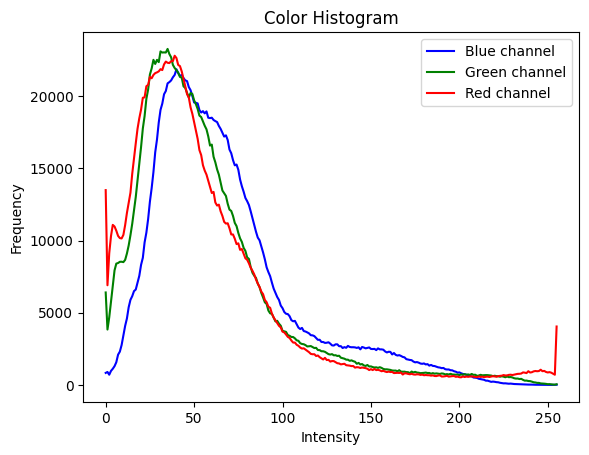

In [350]:
hist_b, hist_g, hist_r = [cv2.calcHist([mandrillRGB], [i], None, [256], [0, 256]) for i in range(3)]

intensity_values = np.arange(0, 256)

plt.plot(intensity_values, hist_b, color="blue", label="Blue channel")
plt.plot(intensity_values, hist_g, color="green", label="Green channel")
plt.plot(intensity_values, hist_r, color="red", label="Red channel")

plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.legend()

plt.show()

In the following code, we have done the same but without the for loop. So the cv2.calcHist() calculates all the histograms at once. 

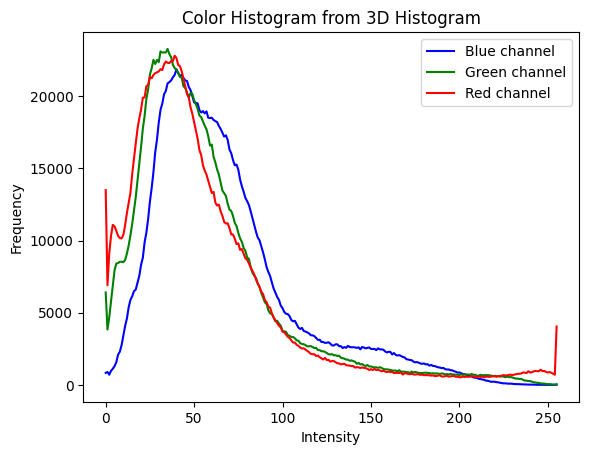

In [351]:
# Calculate 3D histogram for all three channels
histt = cv2.calcHist([mandrillRGB], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

# Project the 3D histogram onto each axis
hist_b = histt.sum(axis=(1, 2))
hist_g = histt.sum(axis=(0, 2))
hist_r = histt.sum(axis=(0, 1))

# Create intensity values for the plot
intensity_values = np.arange(0, 256)

# Plot histograms in one chart
plt.plot(intensity_values, hist_b, color="blue", label="Blue channel")
plt.plot(intensity_values, hist_g, color="green", label="Green channel")
plt.plot(intensity_values, hist_r, color="red", label="Red channel")


# Set labels and legend
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram from 3D Histogram')
plt.legend()

# Show the plot
plt.show()

#### 2. Intensity Transformations


Imagine an image with L intensity values spanning from 0 to L−1. To invert the intensity levels and get the image negatives, we can employ the following formula:

<center> Negative = 𝐿 − 1 − Image </center>

This is termed the image negative. When L=256, the formulas simplify to:

<center>Negative = 255 − Image</center>

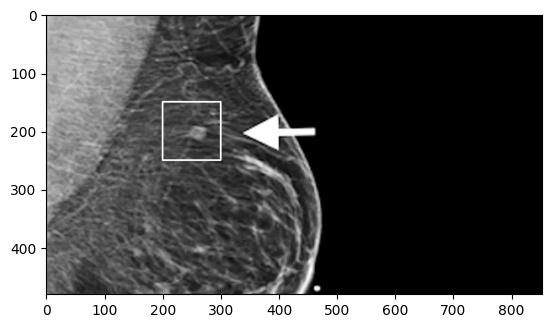

In [352]:
tumor = cv2.imread("Data/09_Histogram/tumor.jpg", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(tumor, pt1=(200, 150), pt2=(300, 250), color = (255), thickness=2) 

plt.imshow(tumor, cmap="gray")
plt.show()

We can apply the intensity transformation:

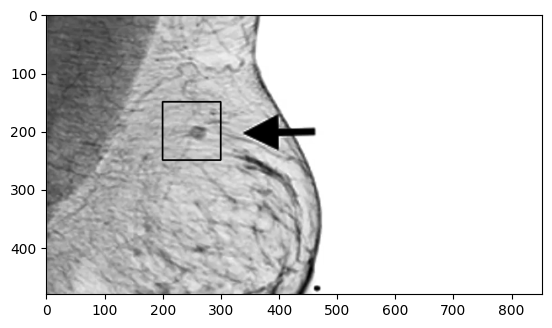

In [353]:
img_neg = -1 * tumor + 255
plt.imshow(img_neg, cmap = "gray")
plt.show()

Contrast Adjustment:

We can employ multiplication by α for contrast control and addition by β to enhance brightness control.

<center> NewImage = 𝛼 * Image + 𝛽</center>

 We don't have implement array operations, we can simply use the convertScaleAbs() function.
 

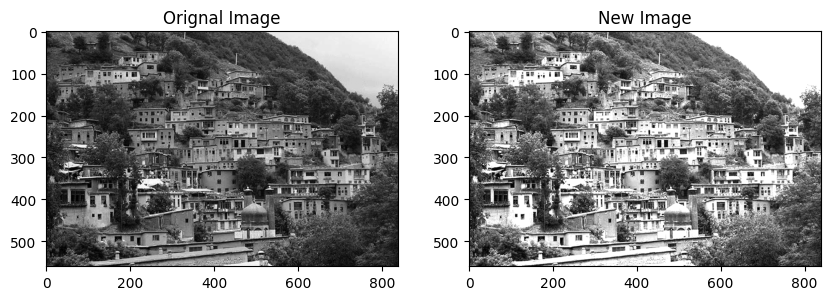

In [354]:
alpha = 1  
beta = 100  
new_village = cv2.convertScaleAbs(village, alpha=alpha, beta=beta)
plot_image(village, new_village)

We can compare histograms too, in which the new image's histogram is shifted.

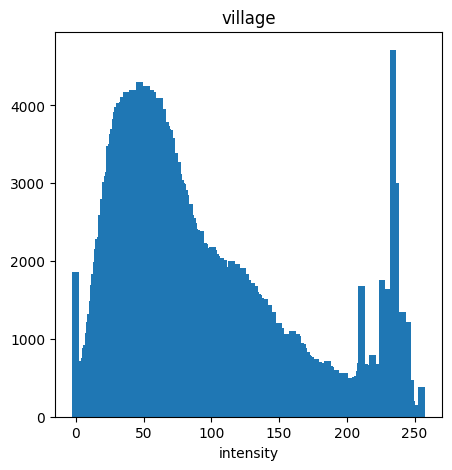

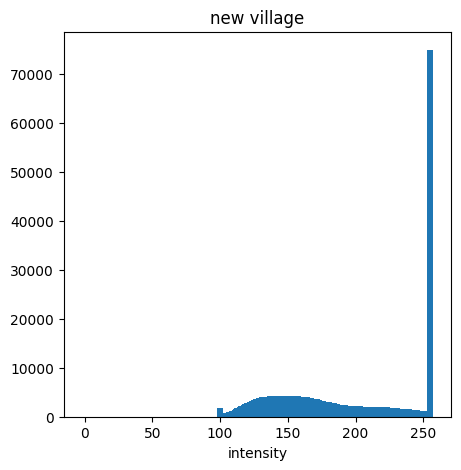

In [355]:
villageHist = cv2.calcHist([village],[0],None,[256],[0,256]) 
new_villageHist = cv2.calcHist([new_village],[0],None,[256],[0,256])

plot_hist(villageHist, "village")
plot_hist(new_villageHist, "new village")

Below there are some more samples.

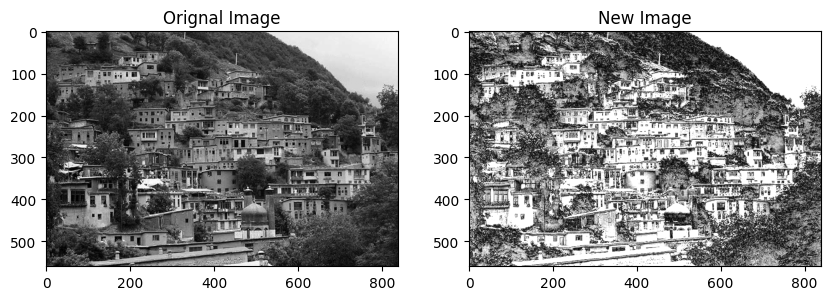

In [356]:
alpha = 4 
beta = -250
new_village = cv2.convertScaleAbs(village, alpha=alpha, beta=beta)
plot_image(village, new_village)

We can also use cv2.equalizeHist() function to make all images with same lighting conditions.

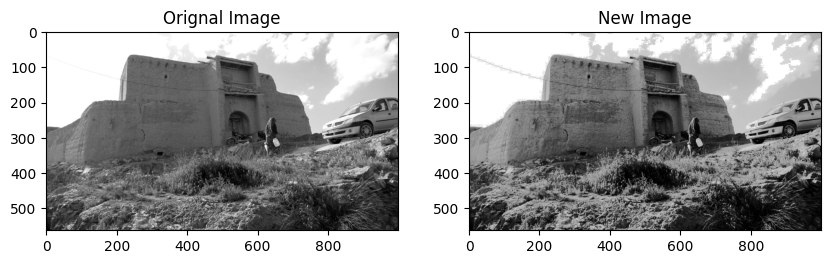

In [357]:
house = cv2.imread("Data/09_Histogram/house.jpg", cv2.IMREAD_GRAYSCALE)
new_house = cv2.equalizeHist(house)
plot_image(house,new_house)

#### 3. Thresholding

Thresholding is a fundamental and extensively applied technique in image segmentation. Image segmentation entails the division of an image into distinct regions or objects, guided by specific characteristics or criteria. In the context of thresholding, the emphasis is on isolating objects or regions from the background by establishing a threshold value.

To this end we can use OpenCV's cv2.threshold() function which returns the resulting binary image. 


cv2.THRESH_BINARY is a constant used in OpenCV for thresholding operations. It specifies the type of thresholding to be applied when using the cv2.threshold function.

In the context of cv2.THRESH_BINARY:

- If pixel value >T, then pixel value = max_value.
- If pixel value <= T, then pixel value = min_value.

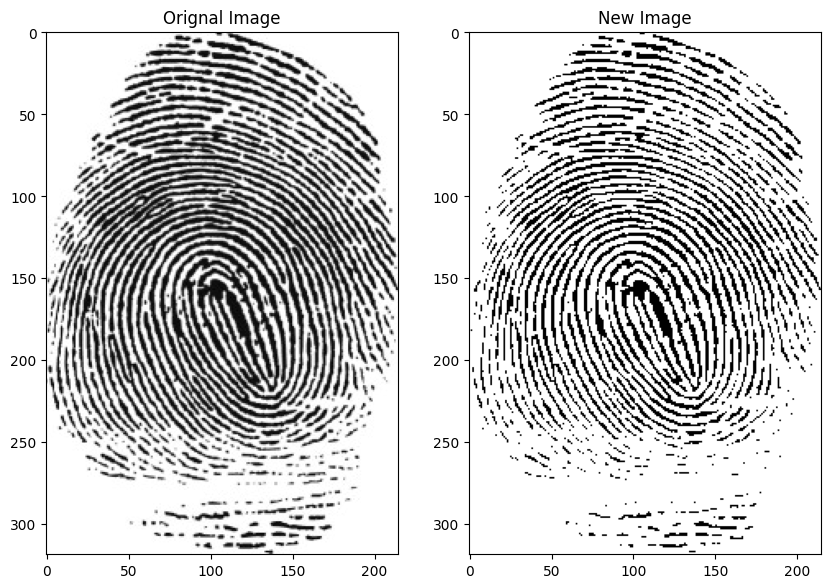

In [359]:
fingerprint = cv2.imread("Data/09_Histogram/fingerprint.jpg", cv2.IMREAD_GRAYSCALE)
threshold = 80
max_value = 255

# Ensure the image is in grayscale
if len(fingerprint.shape) > 2:
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, binary_fingerprint = cv2.threshold(fingerprint, threshold, max_value, cv2.THRESH_BINARY)

plot_image(fingerprint,binary_fingerprint)


We can also use cv2.THRESH_TRUNC in which:

- Pixels with intensity values greater than the specified threshold (T) will be set to the threshold value. 
- Pixels with intensity values less than or equal to the threshold will remain unchanged.

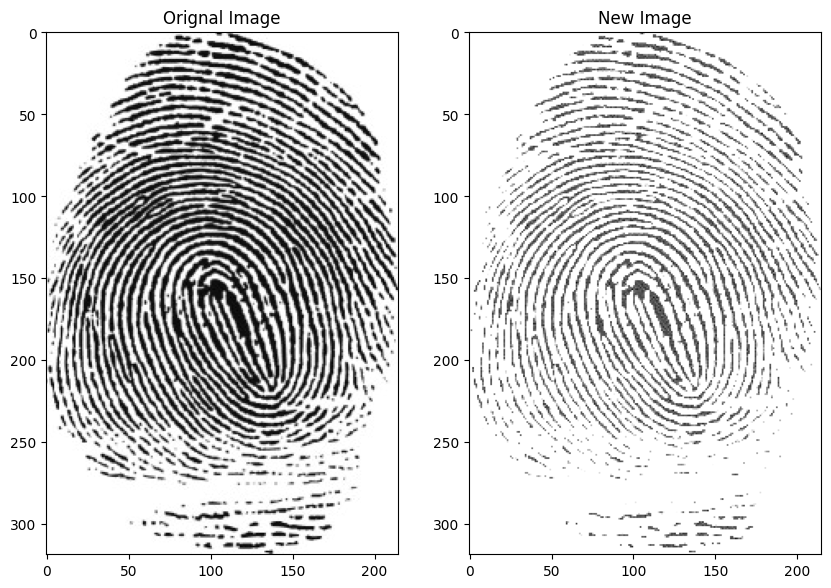

In [361]:
_, binary_fingerprint = cv2.threshold(fingerprint, threshold, max_value, cv2.THRESH_TRUNC)
plot_image(fingerprint,binary_fingerprint)

Regardin cv2.THRESH_OTSU:
- The algorithm calculates an "optimal" threshold that separates the image into two classes (foreground and background).
- It aims to minimize the intra-class variance or maximize the inter-class variance.

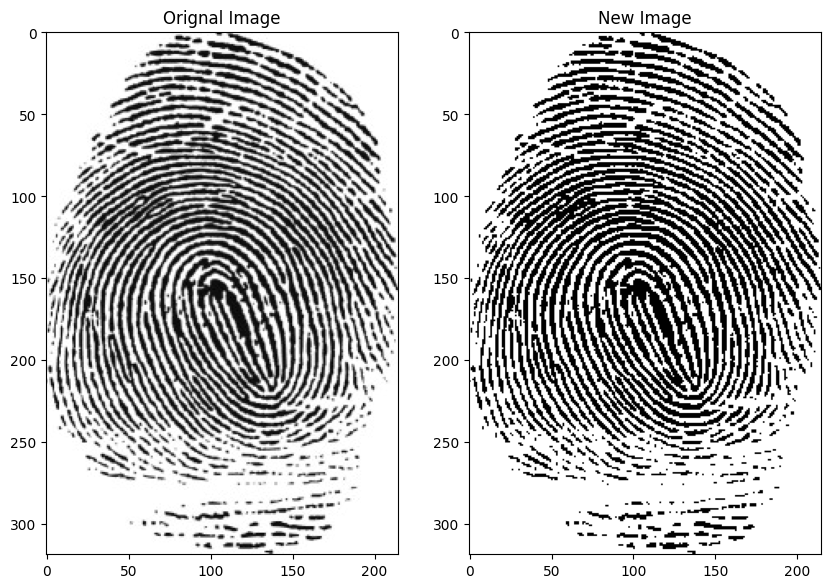

In [362]:
ret, binary_fingerprint = cv2.threshold(fingerprint,0,255,cv2.THRESH_OTSU)

plot_image(fingerprint,binary_fingerprint)

<b>Reference:</b>

[1] Coursera: Introduction to Computer Vision and Image Processing 

[2] Pillow Docs

[3] Open CV